# Playlist Evaluation Notebook

Run the first cell **only once** – it generates the test prompts and asks GPT‑4 Turbo to score each playlist (takes a few minutes).
The remaining cells just visualise the `results.parquet` without extra cost.

In [1]:
import pandas as pd
from pathlib import Path

results_dir = Path("output_results")          # ← cambia si es necesario
criteria = [
    "emotional_alignment", "progression",
    "cohesion", "diversity", "overall_appeal"
]

dfs = []
for csv_path in results_dir.glob("eval_wemo*_wctx*.csv"):
    stem = csv_path.stem                    # p.ej. eval_wemo4_wctx6
    wemo_part = [p for p in stem.split("_") if p.startswith("wemo")][0]
    wctx_part = [p for p in stem.split("_") if p.startswith("wctx")][0]
    w_emo = int(wemo_part.replace("wemo", "")) / 10
    w_ctx = int(wctx_part.replace("wctx", "")) / 10

    df = pd.read_csv(csv_path)
    df["w_emo"] = w_emo
    df["w_ctx"] = w_ctx
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)
all_df.head()


ValueError: No objects to concatenate

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x="w_emo", y="overall", palette="viridis")
plt.title("Distribución de 'overall' por peso emocional (w_emo)")
plt.xlabel("w_emo (1 → solo emoción, 0 → solo contexto)")
plt.ylabel("Puntaje 'overall'")
plt.show()

In [ ]:
mean_df = (
    all_df
    .groupby(["w_emo", "w_ctx"], as_index=False)
    [criteria].mean()
)

mean_df_melt = mean_df.melt(
    id_vars=["w_emo", "w_ctx"],
    value_vars=criteria,
    var_name="criterion",
    value_name="mean_score"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=mean_df_melt,
    x="criterion",
    y="mean_score",
    hue="w_emo",
    palette="viridis"
)
plt.title("Promedio de cada criterio por w_emo")
plt.ylabel("Puntaje medio")
plt.legend(title="w_emo", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
top5 = all_df.sort_values("overall", ascending=False).head(5)
cols = ["prompt_1", "prompt_2", "emo_1", "emo_2", "track_ids", "overall"]
top5[cols]

In [ ]:
def ids_to_list(s):
    return s.split(";") if isinstance(s, str) else []

top5["track_ids_list"] = top5["track_ids"].apply(ids_to_list)
top5[["track_ids_list", "overall"]]


## VIEJO

In [1]:
import pandas as pd
df = pd.read_parquet("evaluation.playlist.results.parquet")
print(df[["prompt_1", "prompt_2", "overall"]].head())


                                        prompt_1  \
0                                 I'm motivated.   
1     I'm feeling overwhelmed after a rough day.   
2  Today was exhausting and I'm quite nostalgic.   
3                                I'm frustrated.   
4                                       I'm sad.   

                               prompt_2  overall  
0     Help me reach a more joyful mood.      3.8  
1                                            3.6  
2              I want to end up joyful.      3.8  
3     Help me reach a more lonely mood.      3.0  
4  Help me reach a more confident mood.      3.8  


In [2]:
df.to_csv("results.csv", index=False)


/home/camila/anaconda3/envs/NLP/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running evaluation with weights: emotion=0.1, context=0.9
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 3.8


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.00,2.00,2.0,2.0
mean,4.0,4.0,3.50,3.50,4.0,3.8
std,0.0,0.0,0.71,0.71,0.0,0.0
min,4.0,4.0,3.00,3.00,4.0,3.8
25%,4.0,4.0,3.25,3.25,4.0,3.8
50%,4.0,4.0,3.50,3.50,4.0,3.8
75%,4.0,4.0,3.75,3.75,4.0,3.8
max,4.0,4.0,4.00,4.00,4.0,3.8


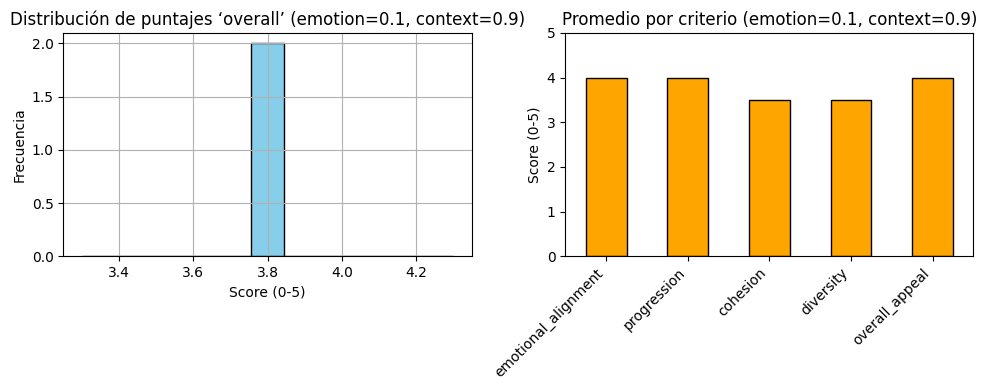

Top 5 playlists (emotion=0.1, context=0.9):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.8


Bottom 5 playlists (emotion=0.1, context=0.9):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.8


Running evaluation with weights: emotion=0.2, context=0.8
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.6
Amount of songs selected: 7
✓ Feeling stressed… → 3.8


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.0,2.00,2.0,2.00
mean,4.0,4.0,3.0,3.50,4.0,3.70
std,0.0,0.0,0.0,0.71,0.0,0.14
min,4.0,4.0,3.0,3.00,4.0,3.60
25%,4.0,4.0,3.0,3.25,4.0,3.65
50%,4.0,4.0,3.0,3.50,4.0,3.70
75%,4.0,4.0,3.0,3.75,4.0,3.75
max,4.0,4.0,3.0,4.00,4.0,3.80


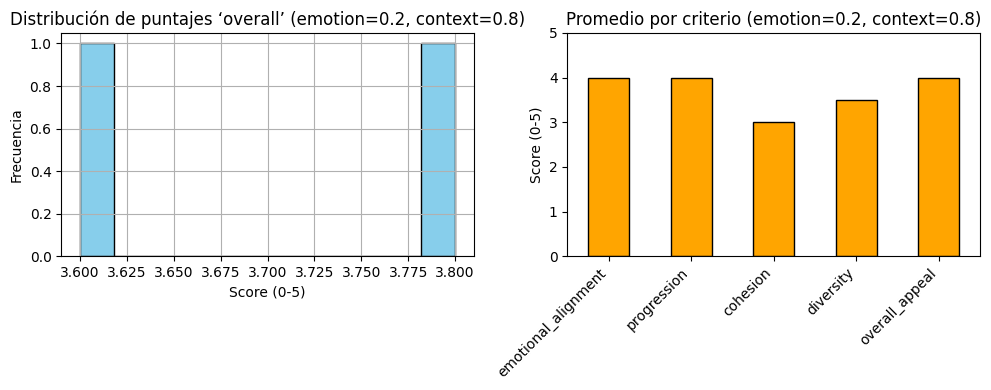

Top 5 playlists (emotion=0.2, context=0.8):


,prompt_1,prompt_2,score
1,Feeling stressed,Want to feel calm and relaxed,3.8
0,Feeling sad and lonely,Want to feel happy and energetic,3.6


Bottom 5 playlists (emotion=0.2, context=0.8):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.6
1,Feeling stressed,Want to feel calm and relaxed,3.8


Running evaluation with weights: emotion=0.3, context=0.7
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 3.6


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.0,2.00,2.0,2.00
mean,4.0,4.0,3.0,3.50,4.0,3.70
std,0.0,0.0,0.0,0.71,0.0,0.14
min,4.0,4.0,3.0,3.00,4.0,3.60
25%,4.0,4.0,3.0,3.25,4.0,3.65
50%,4.0,4.0,3.0,3.50,4.0,3.70
75%,4.0,4.0,3.0,3.75,4.0,3.75
max,4.0,4.0,3.0,4.00,4.0,3.80


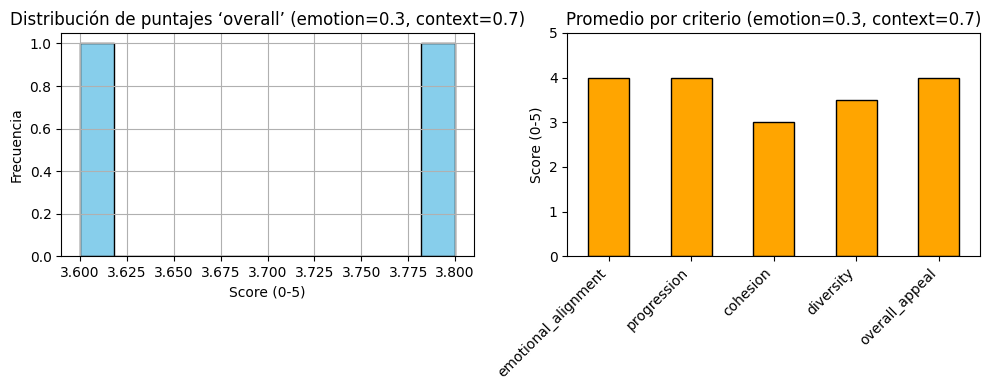

Top 5 playlists (emotion=0.3, context=0.7):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.6


Bottom 5 playlists (emotion=0.3, context=0.7):


,prompt_1,prompt_2,score
1,Feeling stressed,Want to feel calm and relaxed,3.6
0,Feeling sad and lonely,Want to feel happy and energetic,3.8


Running evaluation with weights: emotion=0.4, context=0.6
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 3.8


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.00,2.00,2.0,2.0
mean,4.0,4.0,3.50,3.50,4.0,3.8
std,0.0,0.0,0.71,0.71,0.0,0.0
min,4.0,4.0,3.00,3.00,4.0,3.8
25%,4.0,4.0,3.25,3.25,4.0,3.8
50%,4.0,4.0,3.50,3.50,4.0,3.8
75%,4.0,4.0,3.75,3.75,4.0,3.8
max,4.0,4.0,4.00,4.00,4.0,3.8


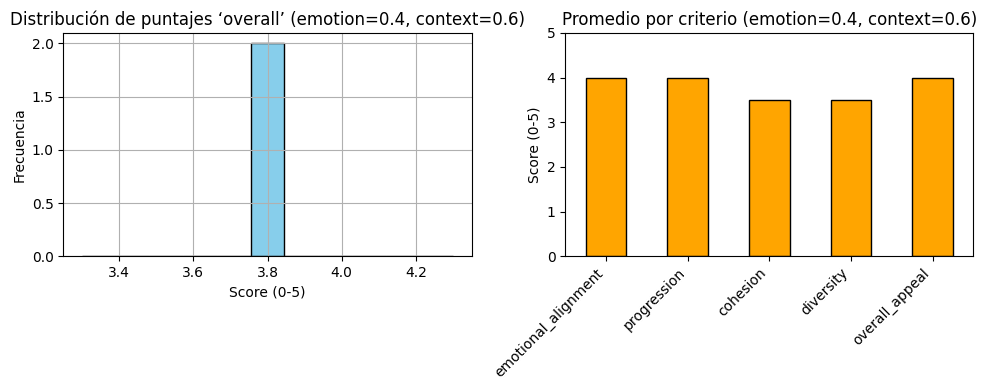

Top 5 playlists (emotion=0.4, context=0.6):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.8


Bottom 5 playlists (emotion=0.4, context=0.6):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.8


Running evaluation with weights: emotion=0.5, context=0.5
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 3.6


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.0,2.00,2.0,2.00
mean,4.0,4.0,3.0,3.50,4.0,3.70
std,0.0,0.0,0.0,0.71,0.0,0.14
min,4.0,4.0,3.0,3.00,4.0,3.60
25%,4.0,4.0,3.0,3.25,4.0,3.65
50%,4.0,4.0,3.0,3.50,4.0,3.70
75%,4.0,4.0,3.0,3.75,4.0,3.75
max,4.0,4.0,3.0,4.00,4.0,3.80


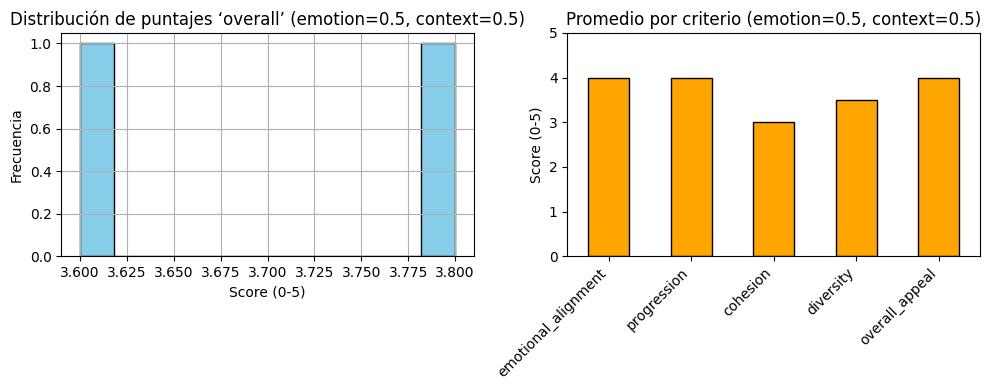

Top 5 playlists (emotion=0.5, context=0.5):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.6


Bottom 5 playlists (emotion=0.5, context=0.5):


,prompt_1,prompt_2,score
1,Feeling stressed,Want to feel calm and relaxed,3.6
0,Feeling sad and lonely,Want to feel happy and energetic,3.8


Running evaluation with weights: emotion=0.6, context=0.4
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 3.8


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.00,2.00,2.0,2.0
mean,4.0,4.0,3.50,3.50,4.0,3.8
std,0.0,0.0,0.71,0.71,0.0,0.0
min,4.0,4.0,3.00,3.00,4.0,3.8
25%,4.0,4.0,3.25,3.25,4.0,3.8
50%,4.0,4.0,3.50,3.50,4.0,3.8
75%,4.0,4.0,3.75,3.75,4.0,3.8
max,4.0,4.0,4.00,4.00,4.0,3.8


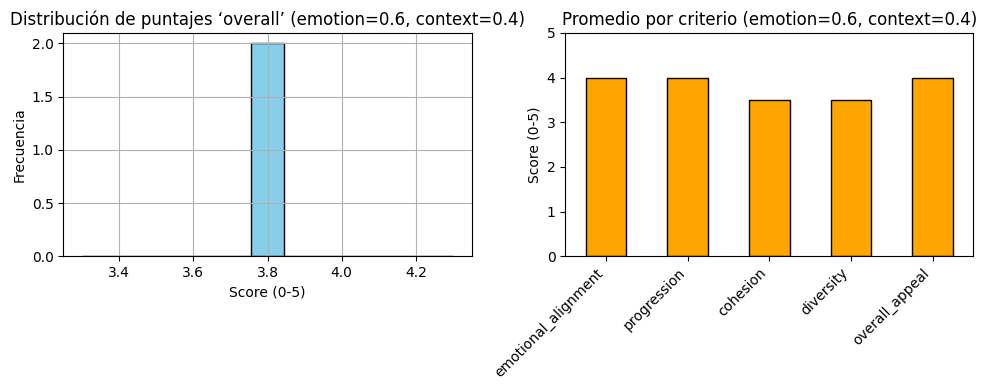

Top 5 playlists (emotion=0.6, context=0.4):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.8


Bottom 5 playlists (emotion=0.6, context=0.4):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.8


Running evaluation with weights: emotion=0.7, context=0.3
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.6
Amount of songs selected: 7
✓ Feeling stressed… → 3.6


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.0,2.0,2.0,2.0
mean,4.0,4.0,3.0,3.0,4.0,3.6
std,0.0,0.0,0.0,0.0,0.0,0.0
min,4.0,4.0,3.0,3.0,4.0,3.6
25%,4.0,4.0,3.0,3.0,4.0,3.6
50%,4.0,4.0,3.0,3.0,4.0,3.6
75%,4.0,4.0,3.0,3.0,4.0,3.6
max,4.0,4.0,3.0,3.0,4.0,3.6


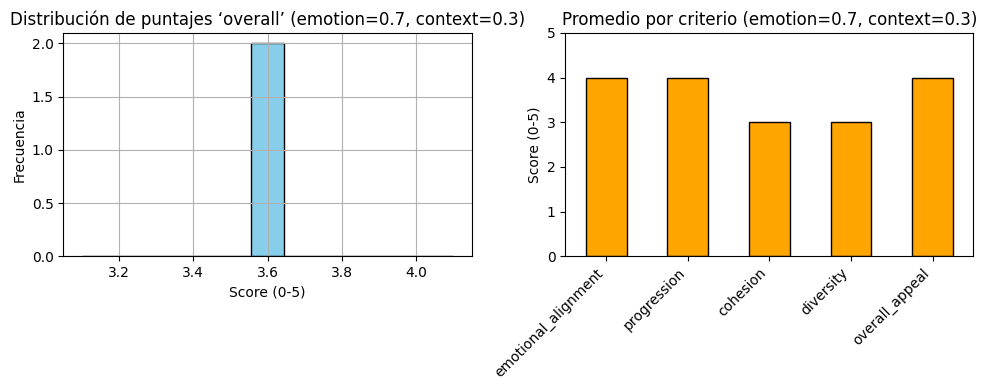

Top 5 playlists (emotion=0.7, context=0.3):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.6
1,Feeling stressed,Want to feel calm and relaxed,3.6


Bottom 5 playlists (emotion=0.7, context=0.3):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.6
1,Feeling stressed,Want to feel calm and relaxed,3.6


Running evaluation with weights: emotion=0.8, context=0.2
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 4.0


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.00,2.00,2.00,2.0,2.00
mean,4.0,4.50,3.50,3.50,4.0,3.90
std,0.0,0.71,0.71,0.71,0.0,0.14
min,4.0,4.00,3.00,3.00,4.0,3.80
25%,4.0,4.25,3.25,3.25,4.0,3.85
50%,4.0,4.50,3.50,3.50,4.0,3.90
75%,4.0,4.75,3.75,3.75,4.0,3.95
max,4.0,5.00,4.00,4.00,4.0,4.00


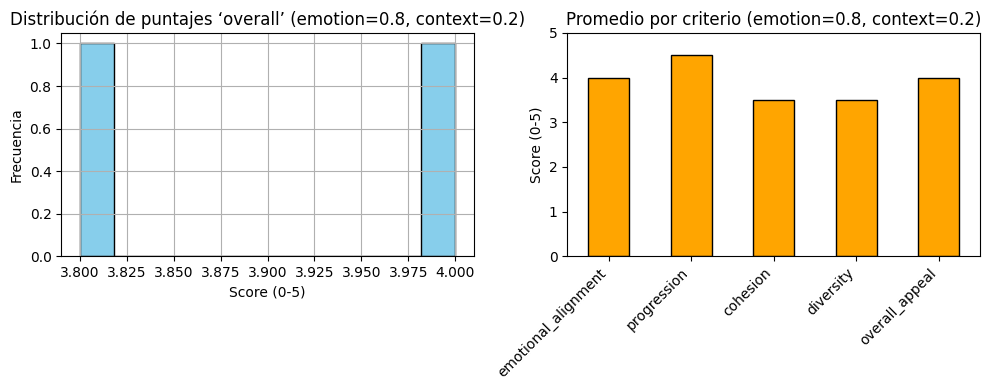

Top 5 playlists (emotion=0.8, context=0.2):


,prompt_1,prompt_2,score
1,Feeling stressed,Want to feel calm and relaxed,4.0
0,Feeling sad and lonely,Want to feel happy and energetic,3.8


Bottom 5 playlists (emotion=0.8, context=0.2):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,4.0


Running evaluation with weights: emotion=0.9, context=0.1
Amount of songs selected: 7
✓ Feeling sad and lonely… → 3.8
Amount of songs selected: 7
✓ Feeling stressed… → 3.6


,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,2.0,2.0,2.0,2.00,2.0,2.00
mean,4.0,4.0,3.0,3.50,4.0,3.70
std,0.0,0.0,0.0,0.71,0.0,0.14
min,4.0,4.0,3.0,3.00,4.0,3.60
25%,4.0,4.0,3.0,3.25,4.0,3.65
50%,4.0,4.0,3.0,3.50,4.0,3.70
75%,4.0,4.0,3.0,3.75,4.0,3.75
max,4.0,4.0,3.0,4.00,4.0,3.80


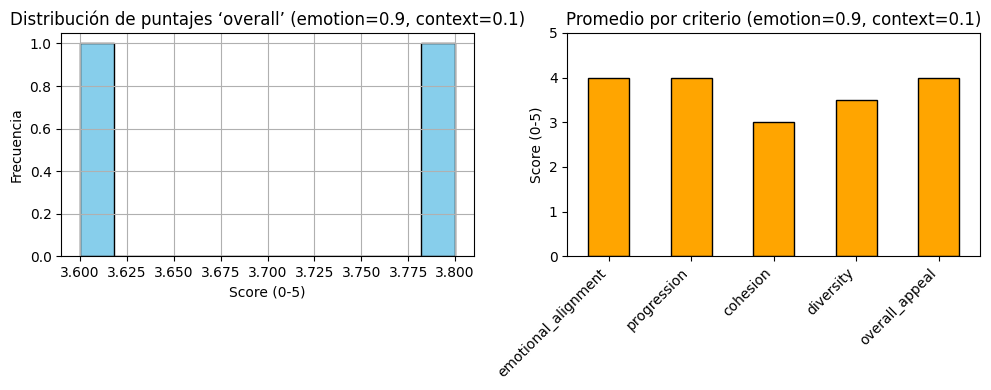

Top 5 playlists (emotion=0.9, context=0.1):


,prompt_1,prompt_2,score
0,Feeling sad and lonely,Want to feel happy and energetic,3.8
1,Feeling stressed,Want to feel calm and relaxed,3.6


Bottom 5 playlists (emotion=0.9, context=0.1):


,prompt_1,prompt_2,score
1,Feeling stressed,Want to feel calm and relaxed,3.6
0,Feeling sad and lonely,Want to feel happy and energetic,3.8


In [1]:
import asyncio
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, "..", ".."))
emotions_dir = os.path.join(project_root, "emotions")
context_dir = os.path.join(project_root, "context")
evaluation_dir = os.path.join(project_root, "evaluation")

for directory in (emotions_dir, context_dir, evaluation_dir):
    if directory not in sys.path:
        sys.path.insert(0, directory)


from playlist_evaluator import evaluate_playlists

# Define los pesos para emotion y context
weights = [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5), 
           (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Define los prompts de prueba
prompts = [
    {"prompt_1": "Feeling sad and lonely", "prompt_2": "Want to feel happy and energetic"},
    {"prompt_1": "Feeling stressed", "prompt_2": "Want to feel calm and relaxed"}
]

# Itera sobre los pesos y evalúa las playlists
for weight_emotion, weight_context in weights:
    print(f"Running evaluation with weights: emotion={weight_emotion}, context={weight_context}")
    
    # Ejecuta la evaluación
    evaluated_df = await evaluate_playlists(prompts, weight_emotion=weight_emotion, weight_context=weight_context)
    
    # Imprime estadísticas descriptivas
    stats = evaluated_df[[
        "emotional_alignment", "progression", "cohesion",
        "diversity", "overall_appeal", "overall"
    ]].describe().round(2)
    display(stats)
    
        # 3. Crea una única figura con dos gráficos
    plt.figure(figsize=(10, 4))
    
    # 3-a Histograma de puntajes globales
    plt.subplot(1, 2, 1)
    evaluated_df["overall"].hist(bins=11, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de puntajes ‘overall’ (emotion={weight_emotion}, context={weight_context})")
    plt.xlabel("Score (0-5)")
    plt.ylabel("Frecuencia")
    
    # 3-b Barra de promedios por criterio
    plt.subplot(1, 2, 2)
    (evaluated_df[[
       "emotional_alignment", "progression",
       "cohesion", "diversity", "overall_appeal"
     ]].mean()
     ).plot(kind="bar", color='orange', edgecolor='black')
    plt.ylim(0, 5)
    plt.title(f"Promedio por criterio (emotion={weight_emotion}, context={weight_context})")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Score (0-5)")
    
    plt.tight_layout()
    plt.show()

    # Imprime las playlists con mejores y peores puntajes
    print(f"Top 5 playlists (emotion={weight_emotion}, context={weight_context}):")
    display(evaluated_df.sort_values("overall", ascending=False)
              .head(5)[["prompt_1", "prompt_2", "overall"]]
              .rename(columns={"overall": "score"}))

    print(f"Bottom 5 playlists (emotion={weight_emotion}, context={weight_context}):")
    display(evaluated_df.sort_values("overall")e
              .head(5)[["prompt_1", "prompt_2", "overall"]]
              .rename(columns={"overall": "score"}))

,emotional_alignment,progression,cohesion,diversity,overall_appeal,overall
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,3.28,3.52,2.82,3.81,3.39,3.36
std,1.16,0.95,0.50,0.39,0.98,0.73
min,0.00,0.00,1.00,3.00,1.00,1.00
25%,3.00,3.75,3.00,4.00,3.00,3.35
50%,4.00,4.00,3.00,4.00,4.00,3.80
75%,4.00,4.00,3.00,4.00,4.00,3.80
max,4.00,4.00,4.00,4.00,4.00,3.80


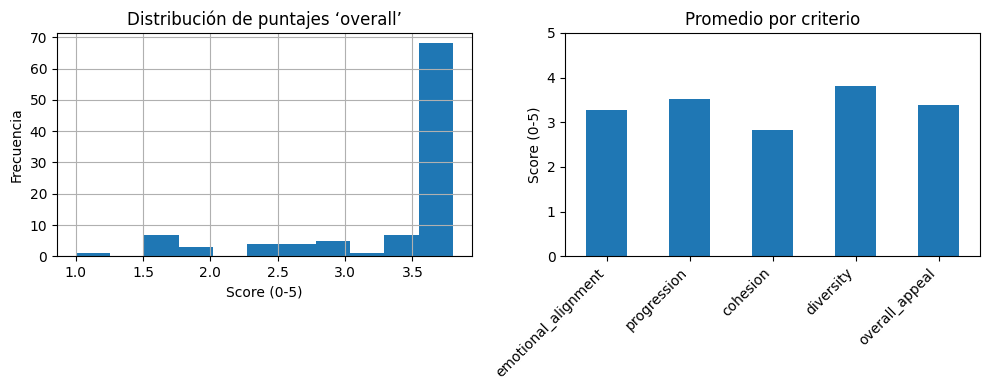

,prompt_1,prompt_2,score
0,I'm motivated.,Help me reach a more joyful mood.,3.8
2,Today was exhausting and I'm quite nostalgic.,I want to end up joyful.,3.8
7,I'm feeling lonely after a rough day.,,3.8
4,I'm sad.,Help me reach a more confident mood.,3.8
35,I'm overwhelmed.,Help me reach a more motivated mood.,3.8


,prompt_1,prompt_2,score
53,I'm frustrated.,Help me reach a more overwhelmed mood.,1.0
5,Today was exhausting and I'm quite frustrated.,I want to end up overwhelmed.,1.6
20,Currently joyful.,My goal is to feel frustrated on my way home.,1.6
19,Currently motivated.,My goal is to feel frustrated on my way home.,1.6
48,I'm frustrated.,Help me reach a more overwhelmed mood.,1.6


In [ ]:
# ─── Playlist-evaluation overview ────────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt

# 2. Muestra estadísticas descriptivas en pantalla
stats = df[[
    "emotional_alignment", "progression", "cohesion",
    "diversity", "overall_appeal", "overall"
]].describe().round(2)
display(stats)          # En Jupyter se ve como tabla

# 3. Crea una única figura con dos gráficos
plt.figure(figsize=(10, 4))

# 3-a Histograma de puntajes globales
plt.subplot(1, 2, 1)
df["overall"].hist(bins=11)
plt.title("Distribución de puntajes ‘overall’")
plt.xlabel("Score (0-5)")
plt.ylabel("Frecuencia")

# 3-b Barra de promedios por criterio
plt.subplot(1, 2, 2)
(df[[
   "emotional_alignment", "progression",
   "cohesion", "diversity", "overall_appeal"
 ]].mean()
 ).plot(kind="bar")
plt.ylim(0, 5)
plt.title("Promedio por criterio")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score (0-5)")

plt.tight_layout()
plt.show()

# 4. Top y bottom 5 playlists
display(df.sort_values("overall", ascending=False)
          .head(5)[["prompt_1", "prompt_2", "overall"]]
          .rename(columns={"overall": "score"}))

display(df.sort_values("overall")
          .head(5)[["prompt_1", "prompt_2", "overall"]]
          .rename(columns={"overall": "score"}))
